In [355]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [356]:
df = pd.read_csv("SBER Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/26/2023,256.02,252.13,257.17,250.90,34.71M,1.33%
1,09/25/2023,252.65,252.00,253.49,249.83,31.86M,0.26%
2,09/22/2023,251.99,249.85,253.10,248.62,40.71M,0.73%
3,09/21/2023,250.16,252.87,254.20,249.81,58.91M,-1.42%
4,09/20/2023,253.77,252.80,255.47,249.82,66.83M,0.42%


In [357]:
df.shape

(3424, 7)

In [358]:
df.isnull().values.any()

False

In [359]:
df = df.rename(columns={"Change %" : "Change", "Vol." : "Vol"})

In [360]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol        object
Change     object
dtype: object

In [361]:
def vol_converter(x):
    if 'M' in x:
        return (float(x.strip('M'))*1000000)
    elif 'B' in x:
        return (float(x.strip('B'))*1000000000)
    

df["Vol"] = df["Vol"].map(vol_converter)
df["Change"] = df["Change"].map(lambda x: float(x.strip('%'))*0.01)


In [362]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
dtype: object

In [363]:
df.describe()

,Price,Open,High,Low,Vol,Change
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000
mean,155.194582,155.207693,157.092956,153.150926,1.005128e+08,0.000571
std,75.041959,75.067396,75.779321,74.219382,8.229731e+07,0.022072
min,53.500000,53.040000,55.450000,47.210000,6.510000e+06,-0.366100
25%,92.030000,92.200000,92.927500,91.120000,4.709000e+07,-0.009825
50%,131.475000,131.565000,133.495000,128.770000,7.557500e+07,0.000300
75%,219.012500,218.627500,222.135000,216.440000,1.265050e+08,0.011700
max,387.600000,385.880000,388.110000,376.720000,1.080000e+09,0.129000


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3424 non-null   object 
 1   Price   3424 non-null   float64
 2   Open    3424 non-null   float64
 3   High    3424 non-null   float64
 4   Low     3424 non-null   float64
 5   Vol     3424 non-null   float64
 6   Change  3424 non-null   float64
dtypes: float64(6), object(1)
memory usage: 187.4+ KB


In [365]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

print(pd.date_range(start = '2010-01-27', end = '2023-09-26' ).difference(df.index))

df.loc[df.index.strftime('%Y-%m-%d') == '2010-02-06']

DatetimeIndex(['2010-01-30', '2010-01-31', '2010-02-06', '2010-02-07',
               '2010-02-13', '2010-02-14', '2010-02-20', '2010-02-21',
               '2010-02-22', '2010-02-23',
               ...
               '2023-08-26', '2023-08-27', '2023-09-02', '2023-09-03',
               '2023-09-09', '2023-09-10', '2023-09-16', '2023-09-17',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=1567, freq=None)


,Price,Open,High,Low,Vol,Change
Date,,,,,,


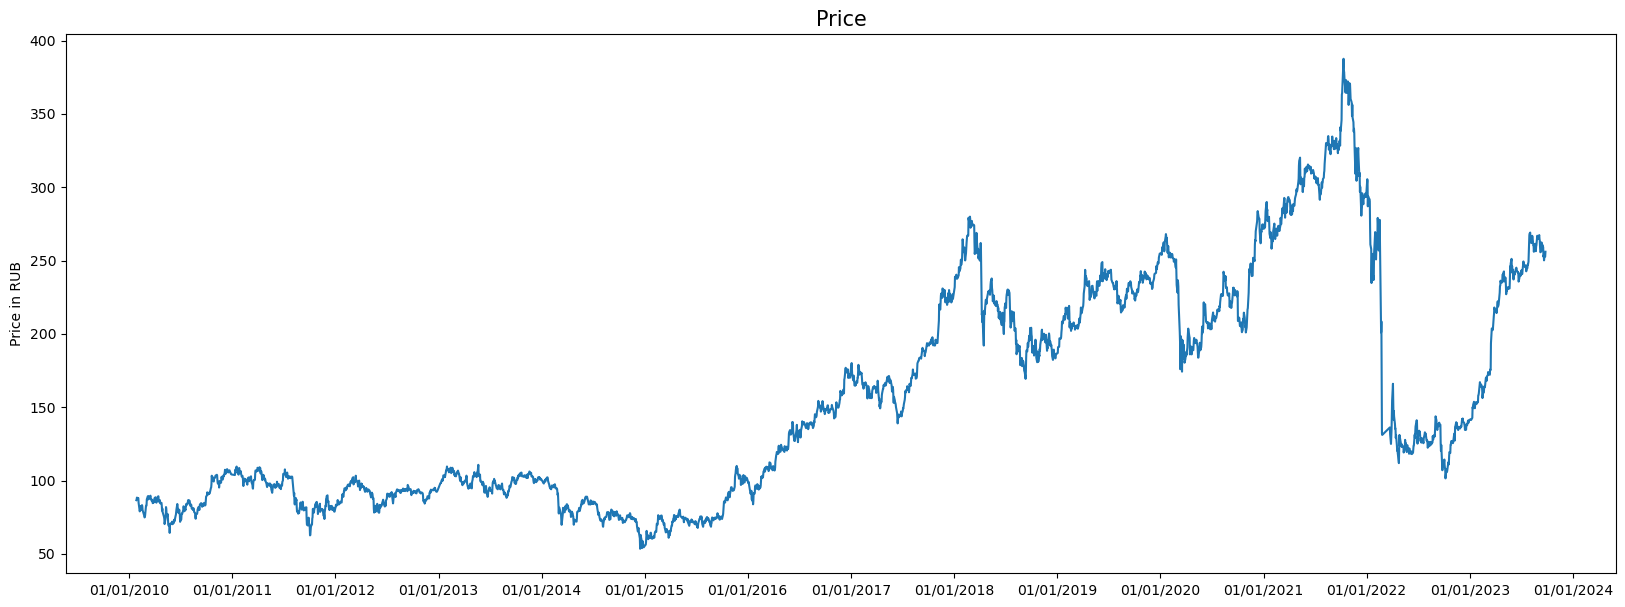

In [366]:
import datetime as dt
import matplotlib.dates as mdates

dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df.index.astype(str)]

plt.figure(figsize=(20,7))
plt.plot(dates, df["Price"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Price', fontsize=15)
plt.ylabel('Price in RUB')
plt.show()

In [367]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
complete_df = pd.DataFrame(index=date_range)
df = complete_df.join(df)
df.interpolate(method="linear", axis=0, inplace=True)


print(pd.date_range(start = '2010-01-27', end = '2023-09-26' ).difference(df.index))
df.loc[df.index.strftime('%Y-%m-%d') == '2010-02-06']

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


,Price,Open,High,Low,Vol,Change
2010-02-06,81.73,83.133333,84.143333,80.263333,267300000.0,-0.029567


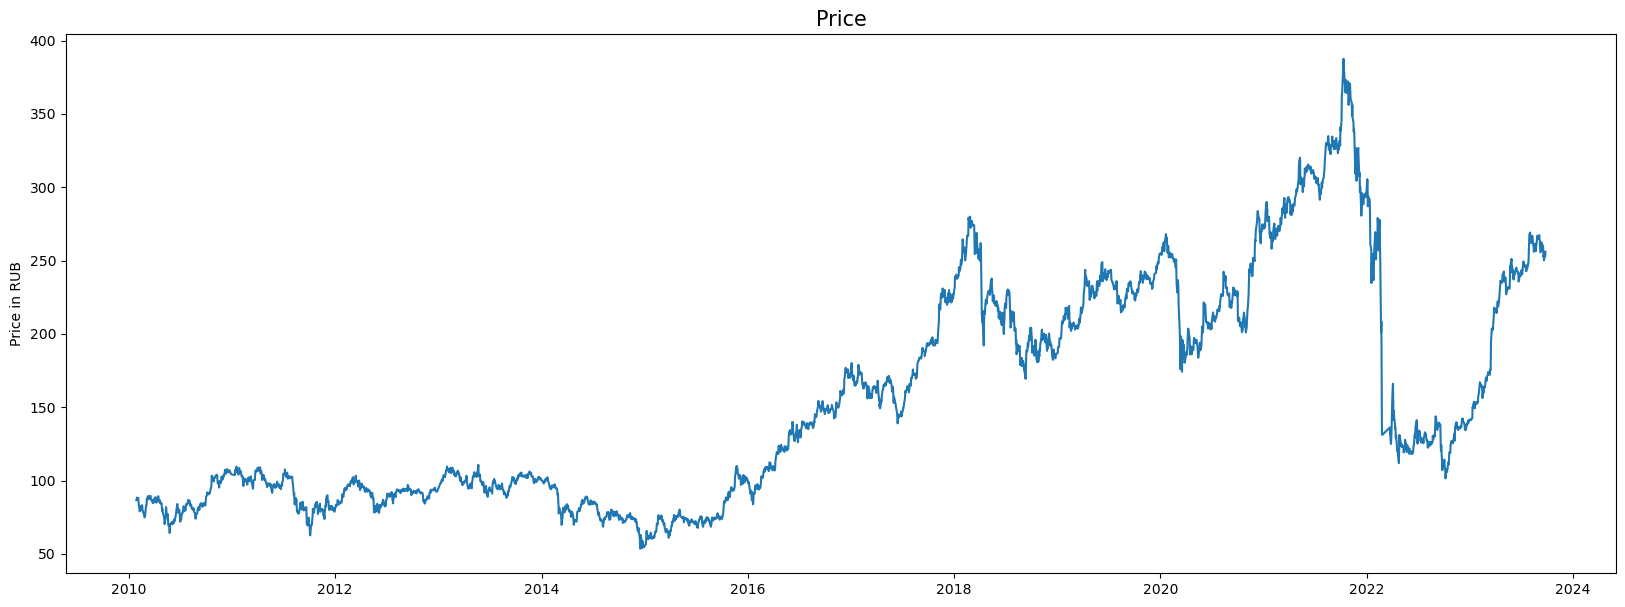

In [368]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df.index.astype(str)]

plt.figure(figsize=(20,7))
plt.plot(dates, df["Price"])

plt.title('Price', fontsize=15)
plt.ylabel('Price in RUB')
plt.show()

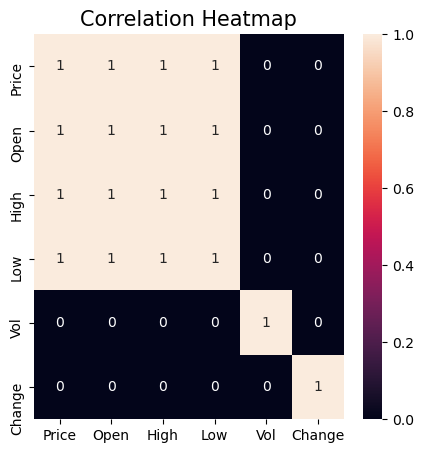

,Price,Open,High,Low,Vol,Change
Price,1.000000,0.999109,0.999267,0.999530,-0.441780,0.019471
Open,0.999109,1.000000,0.999369,0.999206,-0.438190,-0.015066
High,0.999267,0.999369,1.000000,0.998573,-0.427254,-0.001771
Low,0.999530,0.999206,0.998573,1.000000,-0.454025,0.009275
Vol,-0.441780,-0.438190,-0.427254,-0.454025,1.000000,-0.069236
Change,0.019471,-0.015066,-0.001771,0.009275,-0.069236,1.000000


In [369]:
plt.figure(figsize=(5,5))

sb.heatmap(df.corr()> 0.9, annot=True)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

df.corr()


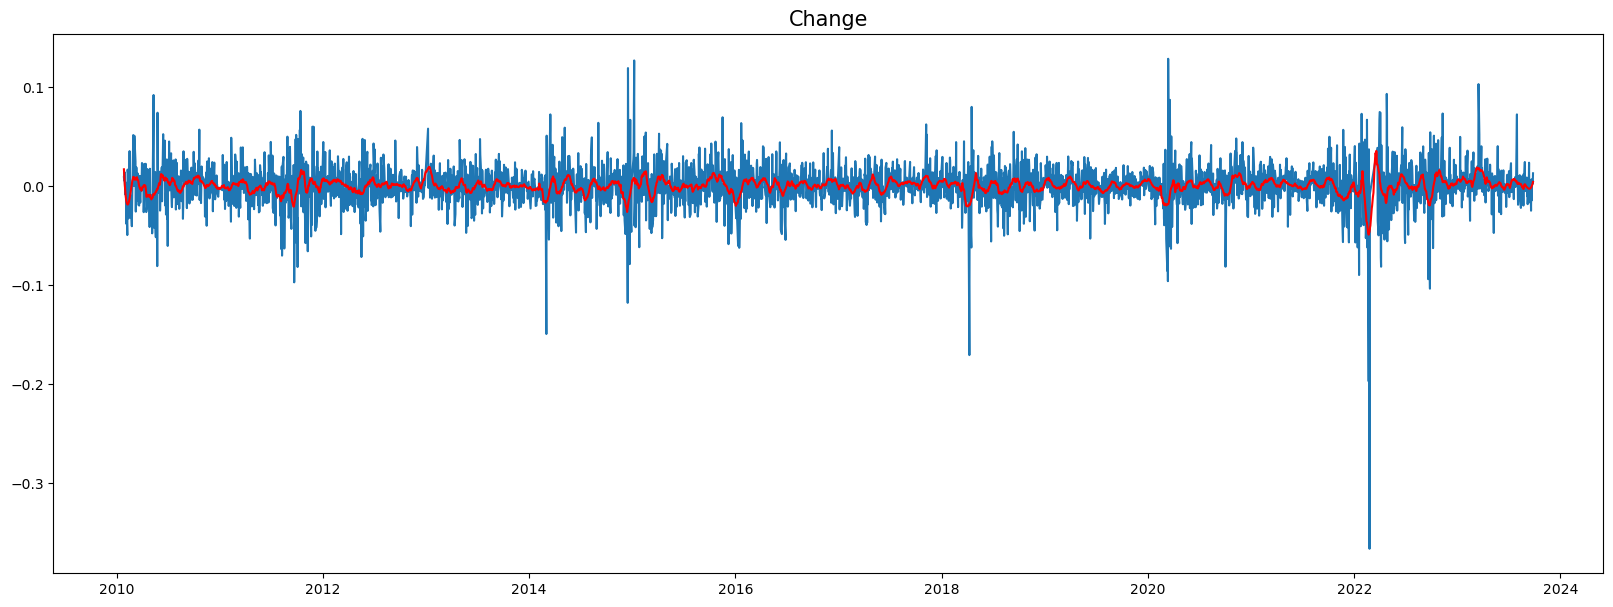

In [370]:
from scipy.signal import savgol_filter


plt.figure(figsize=(20,7))
plt.plot(dates, df["Change"])

change_smoothed = savgol_filter(df["Change"], 51, 3)
plt.plot(dates, change_smoothed, color='red')

plt.title('Change', fontsize=15)
plt.show()

In [371]:
df_by_change = df.sort_values(by=['Change'])

df_by_change.head(20)

,Price,Open,High,Low,Vol,Change
2022-02-24,132.180000,187.540000,187.540000,89.590000,8.293600e+08,-0.366100
2022-02-21,201.000000,249.150000,258.320000,184.300000,1.080000e+09,-0.196900
2018-04-09,213.000000,255.050000,255.300000,205.000000,2.500200e+08,-0.170400
2022-02-23,170.355000,193.130000,203.720000,135.810000,8.876900e+08,-0.164300
2014-03-03,77.570000,85.500000,86.840000,74.960000,4.279100e+08,-0.149100
2022-02-20,217.426667,253.476667,261.213333,204.533333,8.101967e+08,-0.144433
2018-04-08,227.586667,256.913333,257.640000,222.003333,1.801000e+08,-0.120267
2014-12-16,53.500000,59.500000,61.950000,47.210000,4.707500e+08,-0.117600
2022-09-26,107.060000,114.000000,117.990000,105.000000,1.486400e+08,-0.103300
2011-09-22,73.800000,79.820000,79.900000,73.760000,3.830800e+08,-0.096900


In [372]:
df_by_change.tail(20)

,Price,Open,High,Low,Vol,Change
2023-07-31,267.400000,251.330000,267.770000,251.330000,167910000.0,0.072800
2022-01-27,254.290000,235.000000,260.000000,233.100000,301310000.0,0.073400
2022-11-10,136.680000,131.000000,136.690000,129.770000,171750000.0,0.073700
2022-04-04,166.000000,158.760000,166.880000,150.200000,115940000.0,0.074400
2010-05-26,69.120000,66.190000,69.390000,65.600000,517830000.0,0.074500
2022-04-03,162.166667,154.173333,163.053333,148.303333,116920000.0,0.074667
2022-04-02,158.333333,149.586667,159.226667,146.406667,117900000.0,0.074933
2022-04-01,154.500000,145.000000,155.400000,144.510000,118880000.0,0.075200
2011-10-14,80.720000,75.740000,80.880000,74.160000,619490000.0,0.076300
2018-04-17,207.500000,203.020000,207.870000,200.000000,169900000.0,0.080400


            Price       Open       High    Low           Vol    Change
2010-01-27  86.64  85.610000  88.000000  85.07  2.076700e+08  0.009300
2010-01-28  87.15  88.000000  88.750000  86.50  1.734200e+08  0.005900
2010-01-29  88.41  86.440000  88.800000  86.01  1.880600e+08  0.014500
2010-01-30  88.17  86.826667  88.566667  86.29  1.742033e+08  0.006967
2010-01-31  87.93  87.213333  88.333333  86.57  1.603467e+08 -0.000567


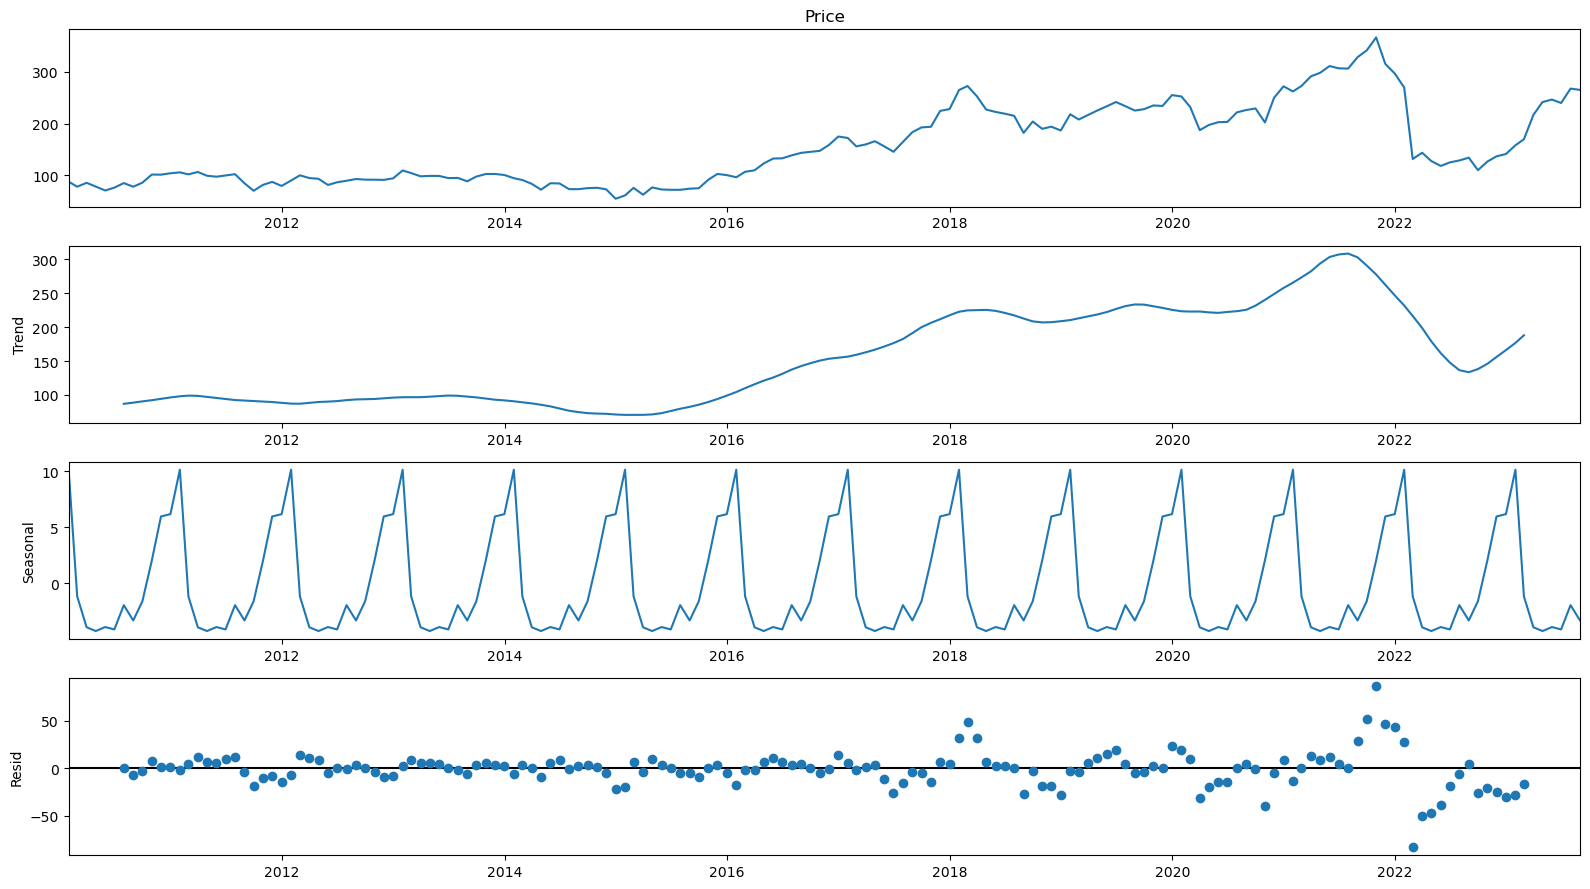

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(df.head())
mountly_df = df.asfreq('M')

price_seasonal_analysis = seasonal_decompose(mountly_df["Price"], model="additive")
volume_seasonal_analysis = seasonal_decompose(mountly_df["Vol"], model="additive")
change_seasonal_analysis = seasonal_decompose(mountly_df["Change"], model="additive")

price_trend = price_seasonal_analysis.trend
seasonal = price_seasonal_analysis.seasonal
residual = price_seasonal_analysis.resid


fig = price_seasonal_analysis.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

plt.show()



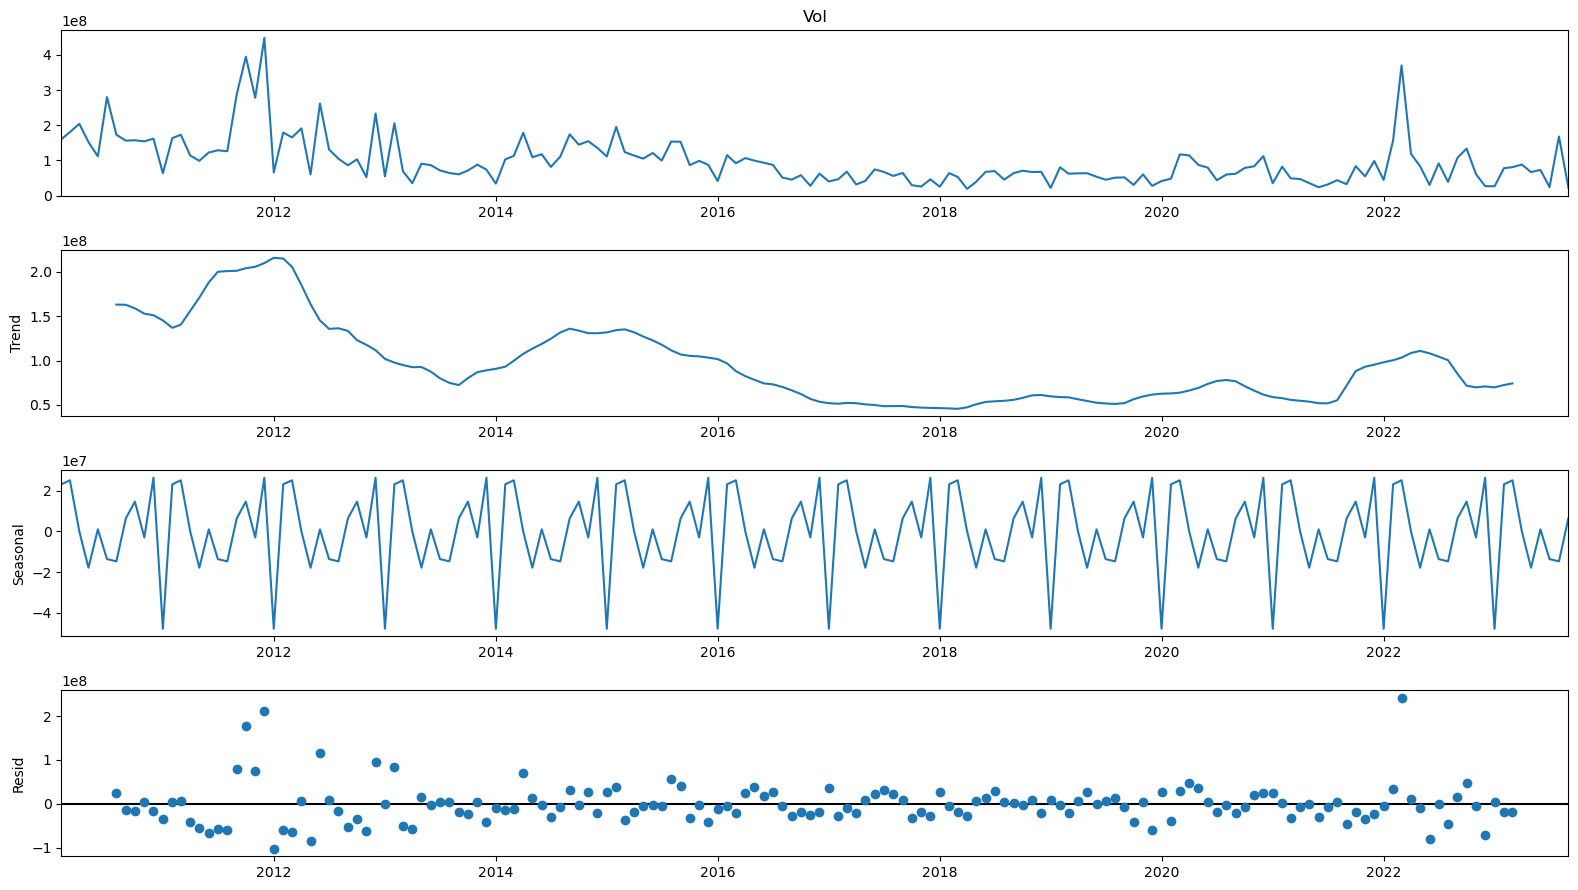

In [374]:
fig = volume_seasonal_analysis.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

plt.show()

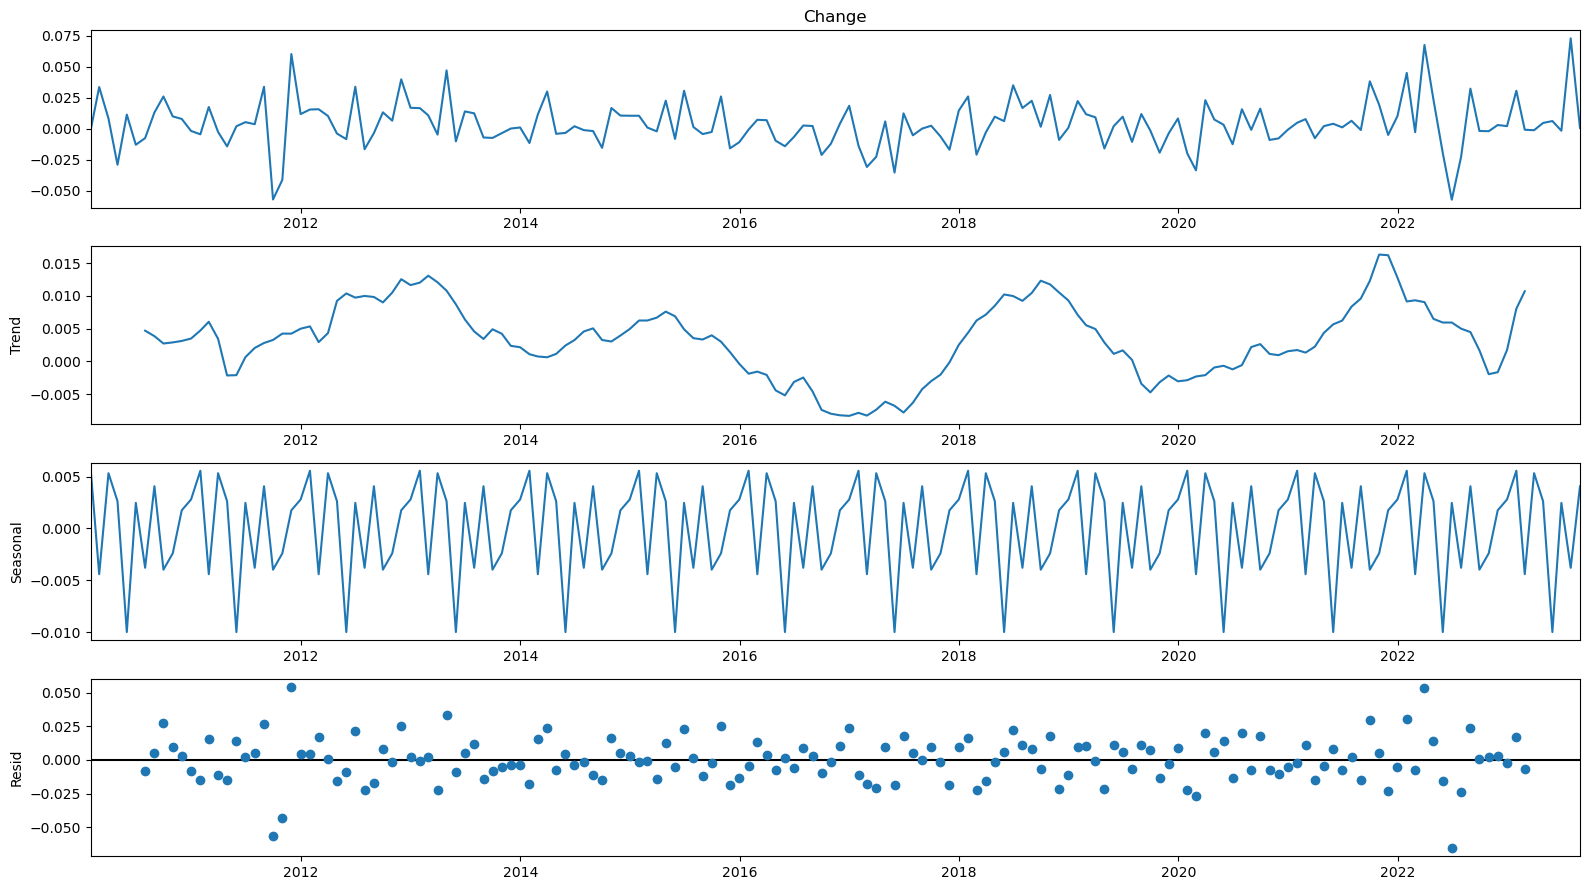

In [375]:
fig = change_seasonal_analysis.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

plt.show()

In [376]:
monthly_std = df.groupby(pd.PeriodIndex(df.index, freq="M"))['Price'].std()

monthly_std = monthly_std.sort_values(ascending=False)

monthly_std.head(20)

2022-02    52.321946
2022-01    23.383996
2021-11    21.176471
2018-04    18.537665
2020-03    18.348284
2023-03    18.130662
2020-11    15.046716
2022-04    14.813119
2017-11    12.267227
2022-09    12.239581
2021-10    11.528961
2021-12    11.471243
2018-09    10.757157
2018-02     9.824085
2023-04     9.416128
2019-01     9.360301
2018-03     9.315224
2018-08     8.762693
2018-07     8.760812
2021-01     8.649320
Freq: M, Name: Price, dtype: float64

In [377]:
monthly_std.tail(20)

2014-09    1.629061
2016-03    1.626987
2012-09    1.569921
2011-06    1.473605
2012-04    1.472308
2016-10    1.466578
2011-07    1.438403
2010-09    1.418890
2014-11    1.413319
2013-02    1.351019
2013-11    1.344131
2010-12    1.274405
2014-10    1.268024
2012-08    1.233415
2013-12    1.208012
2015-06    1.135288
2015-09    1.015741
2012-10    0.836518
2012-12    0.768626
2010-01    0.740945
Freq: M, Name: Price, dtype: float64

In [378]:
from sklearn.preprocessing import MinMaxScaler

price_data = df['Price'].to_numpy()
scaler = MinMaxScaler(feature_range=(-1,1))
price_data = scaler.fit_transform(price_data.reshape(-1,1))

price_data.shape

(4991, 1)

In [379]:
def split_data(data, length, train_split):
    x = []
    y = []
    for i in range(len(data)-length):
        x.append(data[i: i + length])
        y.append(data[i + length])

    split_idx = int(np.ceil(len(x)*train_split))

    return [np.array(x[:split_idx]), np.array(y[:split_idx]),
            np.array(x[split_idx:]), np.array(y[split_idx:])]

In [380]:
x_train, y_train, x_test, y_test = split_data(price_data, 10, 0.8)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3985, 10, 1)
(3985, 1)
(996, 10, 1)
(996, 1)


In [381]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

cpu


In [382]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 50

In [383]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out)
        out = self.fc(out[:, -1, :]) 
        return out

In [384]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [385]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.25235000252723694
Epoch  1 MSE:  0.15975290536880493
Epoch  2 MSE:  0.12262529879808426
Epoch  3 MSE:  0.15169429779052734
Epoch  4 MSE:  0.1258246749639511
Epoch  5 MSE:  0.110257089138031
Epoch  6 MSE:  0.10977652668952942
Epoch  7 MSE:  0.10879218578338623
Epoch  8 MSE:  0.10050772875547409
Epoch  9 MSE:  0.08228009194135666
Epoch  10 MSE:  0.06116406247019768
Epoch  11 MSE:  0.05525410175323486
Epoch  12 MSE:  0.05196148902177811
Epoch  13 MSE:  0.025530388578772545
Epoch  14 MSE:  0.014528383500874043
Epoch  15 MSE:  0.022547312080860138
Epoch  16 MSE:  0.01737980544567108
Epoch  17 MSE:  0.015206359326839447
Epoch  18 MSE:  0.025996841490268707
Epoch  19 MSE:  0.017676662653684616
Epoch  20 MSE:  0.008815715089440346
Epoch  21 MSE:  0.010253848508000374
Epoch  22 MSE:  0.01323982048779726
Epoch  23 MSE:  0.012305415235459805
Epoch  24 MSE:  0.009568668901920319
Epoch  25 MSE:  0.008823043666779995
Epoch  26 MSE:  0.010630383156239986
Epoch  27 MSE:  0.01235110498

In [387]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train.detach().numpy()))

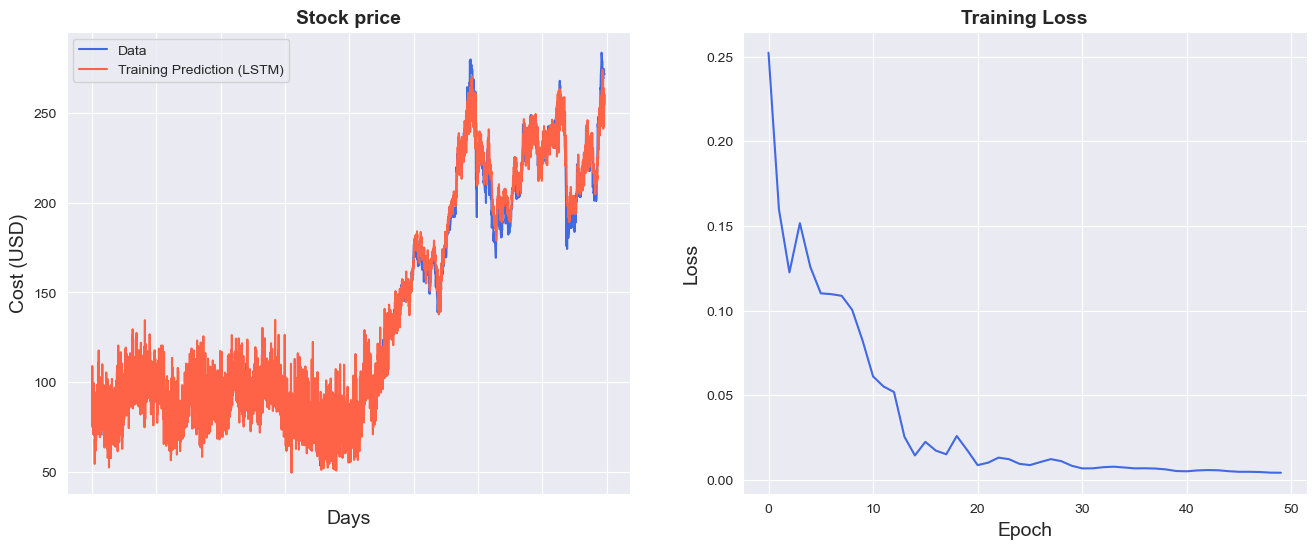

In [389]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)